# Problem 1: Linear Regression from Scratch (30 points)

In [1]:
# import the necessary packages
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(100)

Let's generate some data points first, by the equation $y = x - 3$. 

In [2]:
x = np.random.randint(100, size=100)/30 - 2
X = x.reshape(-1, 1)

y = x + -3 + 0.3*np.random.randn(100)

In [3]:
x.shape, X.shape, y.shape

((100,), (100, 1), (100,))

Let's then visualize the data points we just created. 

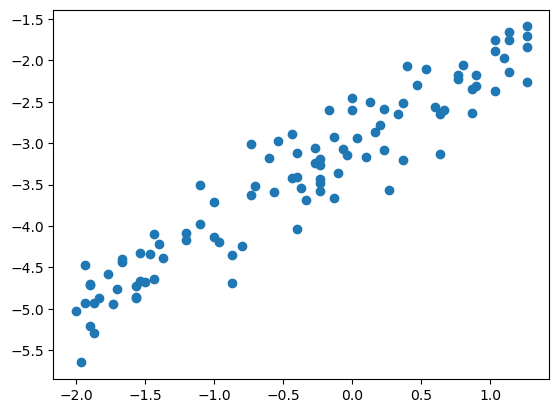

In [4]:
plt.scatter(X, y)

## 1.1 Gradient of vanilla linear regression model (5 points)

In the lecture, we learn that the cost function of a linear regression model can be expressed as **Equation 1**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}$$ 

The gradient of it can be written as **Equation 2**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} [ \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x_{j}^{(i)} ]$$



## 1.2 Gradient of vanilla regularized regression model (5 points)

After adding the L2 regularization term, the linear regression model can be expressed as **Equation 3**:

$$J(\theta)=\frac{1}{2 m} \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j}^{n} (\theta_{j})^{2}$$

The gredient of it can be written as **Equation 4**:

$$\frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} [ \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x_{j}^{(i)} + \lambda \theta_{j} ]$$

Parameter update is as follows: $$ \longrightarrow $$


$$ \theta_{j} := \theta_{j} - \alpha (\frac{1}{m} [ \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x_{j}^{(i)} + \lambda \theta_{j} ] )$$

## 1.3 Implement the cost function of a regularized regression model (5 points)

Please implement the cost function of a regularized regression model according to the above equations.

In [5]:
def objective_function(m, y_residual, l2_regularization=False, lambda_value=None, W=None):
        if l2_regularization:
                (y_residual.dot(y_residual.T) / (2*m)) + (lambda_value/(2*m) * W.dot(W.T))
        return y_residual.dot(y_residual.T) / (2*m)

## 1.4 Implement the gradient of the cost function of a regularized regression model (5 points)

Please implement the gradient of the cost function of a regularized regression model according to the above equations.

In [6]:
def calculate_gradient(m, y_residual, X, l2_regularization=False, lambda_value=None, W=None):
       if l2_regularization:
              return (1 / m) * (X.T.dot(y_residual) + (lambda_value * W))
       return (1 / m) * (X.T.dot(y_residual))
       

In [7]:
def regularized_linear_regression(X, y, alpha=0.01, lambda_value=1, epochs=30):
    """
    :param x: feature matrix
    :param y: target vector
    :param alpha: learning rate (default:0.01)
    :param lambda_value: lambda (default:1)
    :param epochs: maximum number of iterations of the
           linear regression algorithm for a single run (default=30)
    :return: weights, list of the cost function changing overtime
    """
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the cost function (loss function)
    cost_history_list = []
 
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # compute the dot product between our feature 'X' and weight 'W'
        y_estimated = X.dot(W)
 
        # calculate the difference between the actual and predicted value
        error = y_estimated - y
        
############################################################################################################## 
####################################### Begin of Question 1.3 ################################################
##############################################################################################################
      
        ##### Please write down your code here:####
        
        # calculate the cost (MSE) (Equation 1)
        cost_without_regularization = objective_function(m=m, y_residual=error, l2_regularization=False)
        
        ##### Please write down your code here:####
        
        # regularization term
        reg_term = (lambda_value / (2 * m)) * W.dot(W.T)
        
        # calculate the cost (MSE) + regularization term (Equation 3)
        cost_with_regularization = cost_without_regularization + reg_term
        
############################################################################################################## 
####################################### End of Question 1.3 ##################################################
##############################################################################################################          
 
    
############################################################################################################## 
####################################### Begin of Question 1.4 ################################################
############################################################################################################## 
        
        ##### Please write down your code here:####
        
        # calculate the gradient of the cost function with regularization term (Equation )
        gradient = calculate_gradient(m=m, y_residual=error, X=X, l2_regularization=True, lambda_value=lambda_value, W=W)
        
        # Now we have to update our weights
        W = W - alpha * gradient
        
############################################################################################################## 
####################################### End of Question 1.4 ##################################################
##############################################################################################################          
 
 
        # keep track the cost as it changes in each iteration
        cost_history_list.append(cost_with_regularization)
        
    # Let's print out the cost
    print(f"{lambda_value=}")
    print(f"Cost with regularization: {cost_with_regularization}")
    print(f"Mean square error: {cost_without_regularization}")
 
    return W, cost_history_list

Run the following code to train your model. 

Hint: If you have the correct code written above, the cost should be $0.5181222986588751$ when $\lambda = 10$.

lambda_value=0
Cost with regularization: 0.05165888565058273
Mean square error: 0.05165888565058273


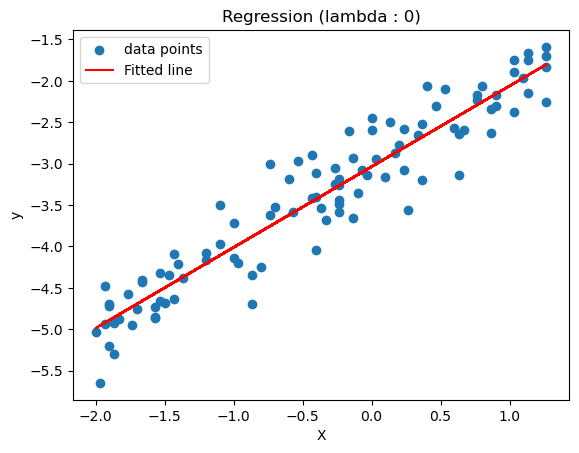

lambda_value=10
Cost with regularization: 0.5181225049184746
Mean square error: 0.08982014821513136


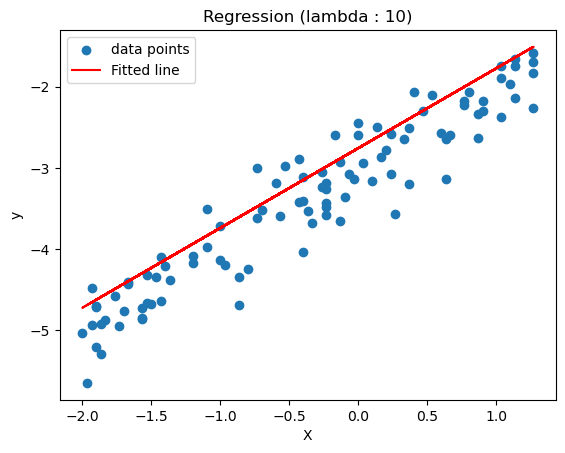

lambda_value=100
Cost with regularization: 2.7931724887400255
Mean square error: 1.2785107029715972


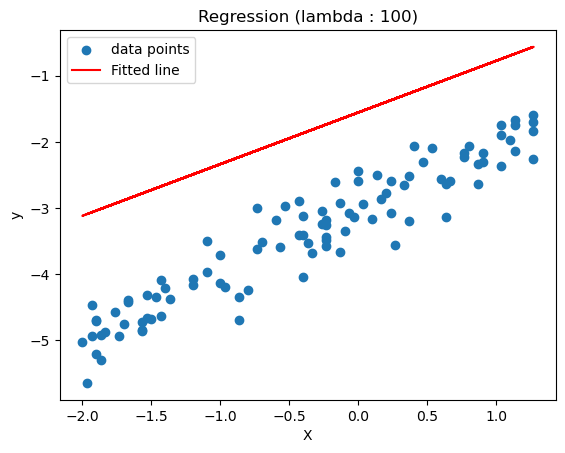

lambda_value=1000
Cost with regularization: 5.591464362606628
Mean square error: 4.946888025066497


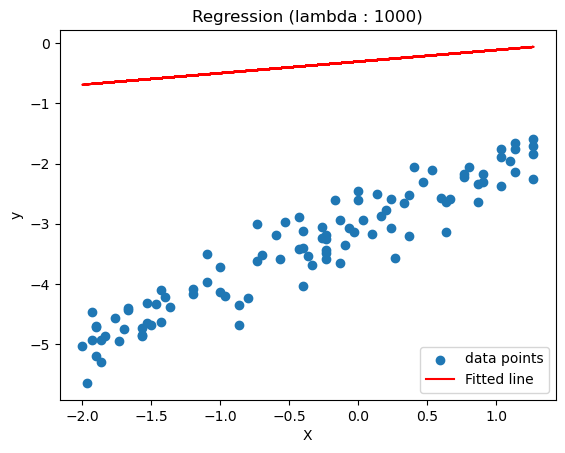

lambda_value=10000
Cost with regularization: 6.242695626933973
Mean square error: 6.161442583355813


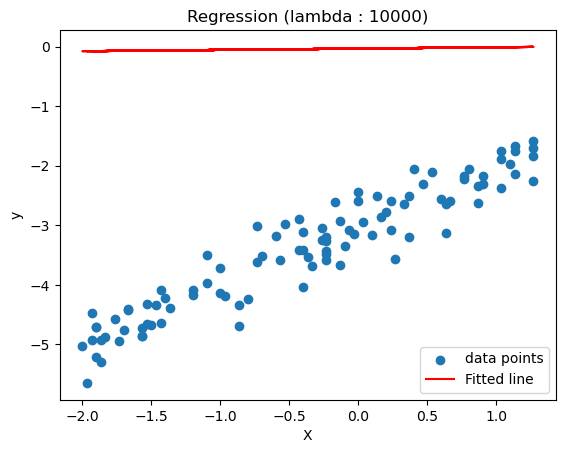

In [8]:
lambda_list = [0, 10, 100, 1000, 10000]
for lambda_ in lambda_list:
    # calls regression function with different values of lambda
    weight, _ = regularized_linear_regression(X, y, alpha=0.01,
                                 lambda_value=lambda_, epochs=1000)
    
    fitted_line = np.dot(X, weight[1]) + weight[0]
    plt.scatter(X, y, label='data points')
    plt.plot(X, fitted_line, color='r', label='Fitted line')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Regression (lambda : {lambda_})")
    plt.legend()
    plt.show()

## 1.5 Analyze your results (10 points)


According to the above figures, what's the best choice of $\lambda$? 

Why the regressed line turns to be flat as we increase $\lambda$?

Your answer:

1.5a
- The best $\lambda$ value is 0. This is not too surprising because regularization is intended to smooth out a fit best line. Since this data is very linear, a simple regression model with no curves or sharp edges can fit the data well, and there is no need for regularization. Actually, regularization made the model perform significantly worse.

1.5b
- In the end of each epoch, the weights get updated as such:
$$ \theta_{j} := \theta_{j} - \alpha (\frac{1}{m} [ \sum_{i}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)x_{j}^{(i)} + \lambda \theta_{j} ] )$$
- When $\lambda$ becomes very high, the regularization term completely dominates the weight update equation. And so all of the $\theta_{1}$ parameters are very high values that are about the same since the non-regularization portion of the update equation become insiginficant. The nearly identical $\theta_{1}$ values result in a flat-like slope.

# Problem 2: Getting familiar with PyTorch (30 points)

In [9]:
import mltools as ml
import torch
import numpy as np
import matplotlib.pyplot as plt

### 2.1
Load the “ data/curve80.txt ” data set, and split it into 75% / 25% training/test. We will use degree=5 for all the polynomial features.

In [10]:
data = np.genfromtxt("data/curve80.txt")
X = data[:,0]
X = np.atleast_2d(X).T # code expects shape (M,N) so make sure i t s 2-dimensional
Y = data[:,1] # doesnt matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75) # split data set 75/25

degree = 5
XtrP = ml.transforms.fpoly(Xtr, degree=degree, bias=False)
XtrP,params = ml.transforms.rescale(XtrP)

Transform numpy arrays to tensor.

In [11]:
XtrP_tensor = torch.from_numpy(XtrP)
Ytr_tensor = torch.from_numpy(Ytr.reshape(-1,1))

XtrP_tensor = XtrP_tensor.float()
Ytr_tensor = Ytr_tensor.float()

Make sure the XtrP_tensor has the shape of (60, 5) while Ytr_tensor has the shape of (60, 1).

In [12]:
assert XtrP_tensor.shape == torch.Size([60, 5])
assert Ytr_tensor.shape == torch.Size([60, 1])
XtrP_tensor.shape, Ytr_tensor.shape

(torch.Size([60, 5]), torch.Size([60, 1]))

### 2.2
Initialize our linear regressor.

In [13]:
linear_regressor = torch.nn.Linear(in_features=XtrP_tensor.shape[1], out_features=Ytr_tensor.shape[1])

### 2.3
Set up the criterion and optimizer.

In [14]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_regressor.parameters(), lr=0.1)
epochs = 100000

### 2.4
Training the regressor using gradient descent.

In [15]:
loss_record = []
for _ in range(epochs):
        optimizer.zero_grad() # set gradient to zero
        pred_y = linear_regressor(XtrP_tensor)
        loss = criterion(pred_y, Ytr_tensor)  # calculate loss function
        loss.backward() # backpropagate gradient
        loss_record.append(loss.item())
        optimizer.step()  # update the parameters in the linear regressor

### 2.5
Plot the loss v.s. epochs. Show the plot here.

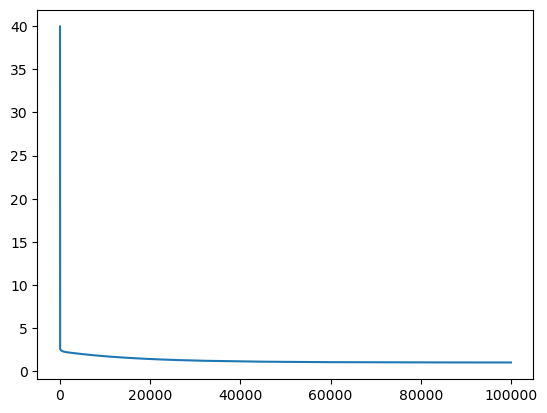

In [16]:
plt.plot(range(epochs), (loss_record))

### 2.6
Visualize the trained linear regressor.

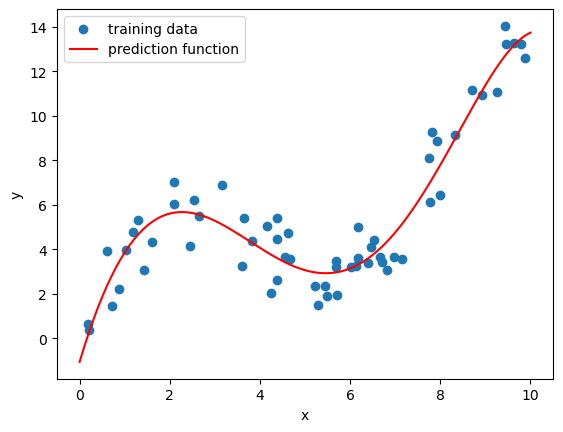

In [17]:
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
xsP, _ = ml.transforms.rescale(ml.transforms.fpoly(xs,degree=degree,bias=False), params)
xsP_tensor = torch.from_numpy(xsP).float()
ys = linear_regressor(xsP_tensor)

plt.scatter(Xtr,Ytr,label="training data")
plt.plot(xs,ys.detach().numpy(),label="prediction function",color ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()